In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.datasets import fashion_mnist
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPooling2D
from keras import optimizers, losses
from sklearn.metrics import classification_report

In [50]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

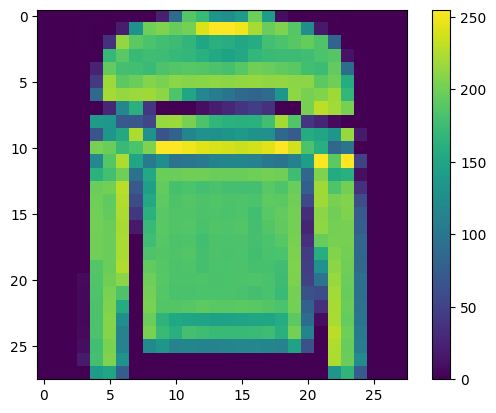

In [51]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


# Виведемо елемент датасету
plt.figure()
plt.imshow(x_train[5])
plt.colorbar()
plt.grid(False)
plt.show()



In [52]:
# Робимо скелінг даних
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

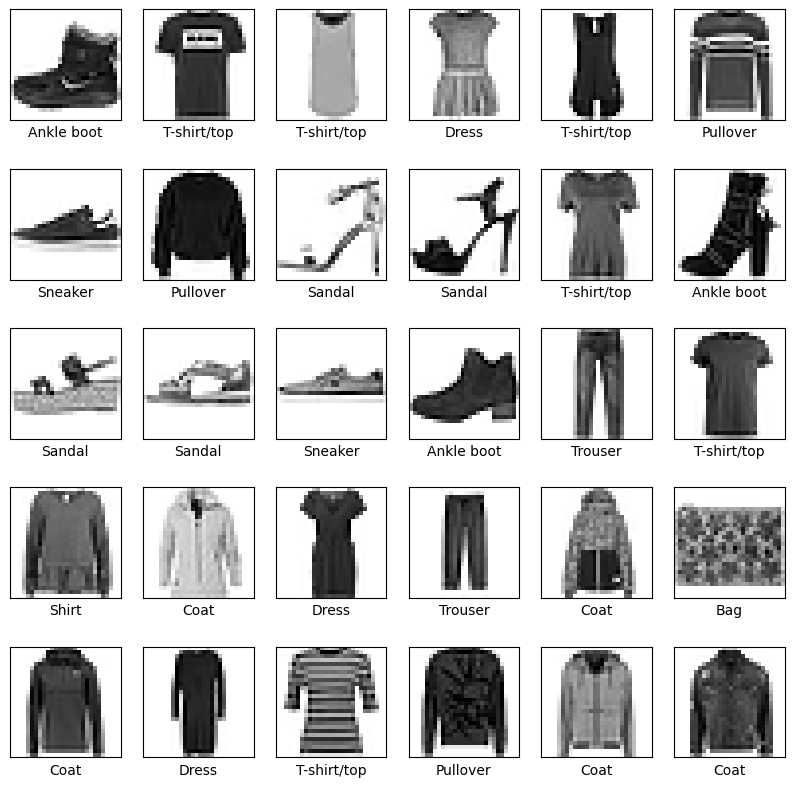

In [53]:
# Подивимось на перші 30 зображень з тренувальної вибірки, щоб впевнитись що дані в правильному форматі
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [54]:
x_train.shape

(60000, 28, 28)

Оскільки зображення мають два виміри, треба додати ще один вимір (колір) для того, щоб із зображенням могли працювати згорткові мережи


In [55]:
x_train= np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
x_train.shape

(60000, 28, 28, 1)

In [56]:
# Модель згорткової мережі
# model = Sequential([
#     Conv2D(32, (5, 5), activation="relu", input_shape=(28, 28, 1)),
#     MaxPooling2D((2, 2)),

#     Conv2D(64, (3, 3), activation="relu"),
#     MaxPooling2D((2, 2)),

#     Conv2D(128, (3, 3), activation="relu"),

#     Flatten(),
#     Dropout(0.2),
#     Dense(64, activation="relu"),
#     Dropout(0.2),
#     Dense(10, activation="softmax")
# ])
model = Sequential([

    Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),

    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    Conv2D(128, (3, 3), activation="relu"),

    Flatten(),
    Dropout(0.2),
    Dense(128, activation="relu"),

    Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 3, 3, 128)         73856     
                                                                 
 flatten_2 (Flatten)         (None, 1152)             

In [57]:
# Компілимо медель
model.compile(optimizers.Adam(learning_rate=0.005),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [58]:
!rm -rf ./logs/
# Підключимо тензорборд для кращої візуалізації

from keras.callbacks import TensorBoard

model_name = 'CNN+Adam'

log_folder = 'logs/fit/' + str(model_name)
tensorboard_callback = TensorBoard(log_dir=log_folder)


# Навчання моделі на тренувальній виборці
history = model.fit(x_train, y_train, epochs=10, batch_size=512, validation_split=0.2, callbacks=[tensorboard_callback])



Epoch 1/10
94/94 [==============================] - 50s 516ms/step - loss: 0.8151 - accuracy: 0.7003 - val_loss: 0.4530 - val_accuracy: 0.8326
Epoch 2/10
94/94 [==============================] - 48s 516ms/step - loss: 0.4147 - accuracy: 0.8476 - val_loss: 0.3571 - val_accuracy: 0.8702
Epoch 3/10
94/94 [==============================] - 48s 516ms/step - loss: 0.3430 - accuracy: 0.8751 - val_loss: 0.3088 - val_accuracy: 0.8867
Epoch 4/10
94/94 [==============================] - 46s 491ms/step - loss: 0.3035 - accuracy: 0.8882 - val_loss: 0.3021 - val_accuracy: 0.8871
Epoch 5/10
94/94 [==============================] - 47s 506ms/step - loss: 0.2786 - accuracy: 0.8968 - val_loss: 0.2984 - val_accuracy: 0.8901
Epoch 6/10
94/94 [==============================] - 48s 516ms/step - loss: 0.2642 - accuracy: 0.9020 - val_loss: 0.2805 - val_accuracy: 0.8965
Epoch 7/10
94/94 [==============================] - 47s 506ms/step - loss: 0.2422 - accuracy: 0.9101 - val_loss: 0.2685 - val_accuracy: 0.9006

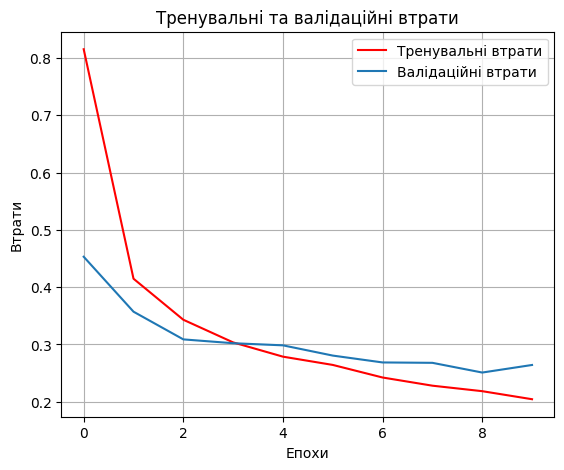

In [59]:
# Візуалізуємо дані
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Тренувальні втрати', color='red')
plt.plot(history.history['val_loss'], label='Валідаційні втрати')
plt.title('Тренувальні та валідаційні втрати')
plt.xlabel('Епохи')
plt.ylabel('Втрати')
plt.grid(True)
plt.legend()


plt.show()

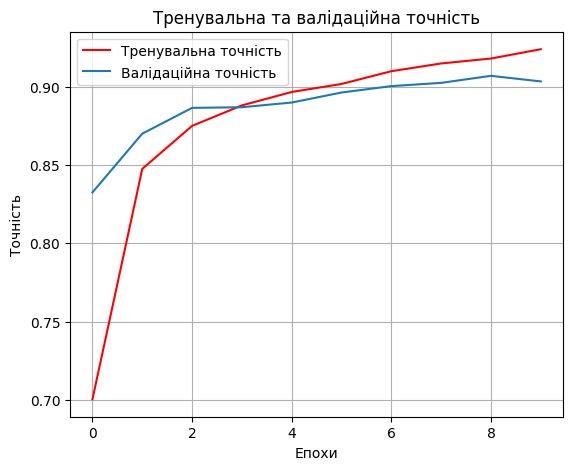

In [60]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Тренувальна точність', color='red')
plt.plot(history.history['val_accuracy'], label='Валідаційна точність')
plt.title('Тренувальна та валідаційна точність')
plt.xlabel('Епохи')
plt.ylabel('Точність')
plt.grid(True)
plt.legend()

plt.show()

In [61]:
# Перевіряємо роботу моделі на тестовій вибірці
score = model.evaluate(x_test, y_test, verbose=0)

print('Функція втрат на тестових даних для 10 епох: {:.4f}'.format(score[0]))
print('Точність на тестових даних на 10 епохах: {:.4f}'.format(score[1]))

Функція втрат на тестових даних для 10 епох: 0.2754
Точність на тестових даних на 10 епохах: 0.9006


In [46]:
# для кожного класу подивимось метріки якості
y_pred_classes = np.argmax(model.predict(x_test), axis=1)
print(classification_report(y_test, y_pred_classes))

313/313 [==============================] - 3s 9ms/step
              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1000
           1       0.98      0.98      0.98      1000
           2       0.85      0.89      0.87      1000
           3       0.91      0.90      0.90      1000
           4       0.83      0.89      0.86      1000
           5       0.98      0.98      0.98      1000
           6       0.80      0.62      0.70      1000
           7       0.95      0.96      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.90     10000
weighted avg       0.91      0.91      0.90     10000



Наша модель видає точність 92% на трейні даних, 90% на валідаційних даних, та 9.% на тестових даних.

Щодо моделі із ДЗ №9, то метрики якості значно покращились у згорткової ( з 0,88 до 0,91 у більшості показників).

Так що, модель на базі згорткової мережі показує кращий результат ніж класична.

Спробуємо попрацювати з прогнозуванням

In [62]:
# Визначаємо функції для побудови графіка повного набору з 10 передбачень класів
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


# Робимо прогнозування
predictions = model.predict(x_test)



313/313 [==============================] - 3s 9ms/step


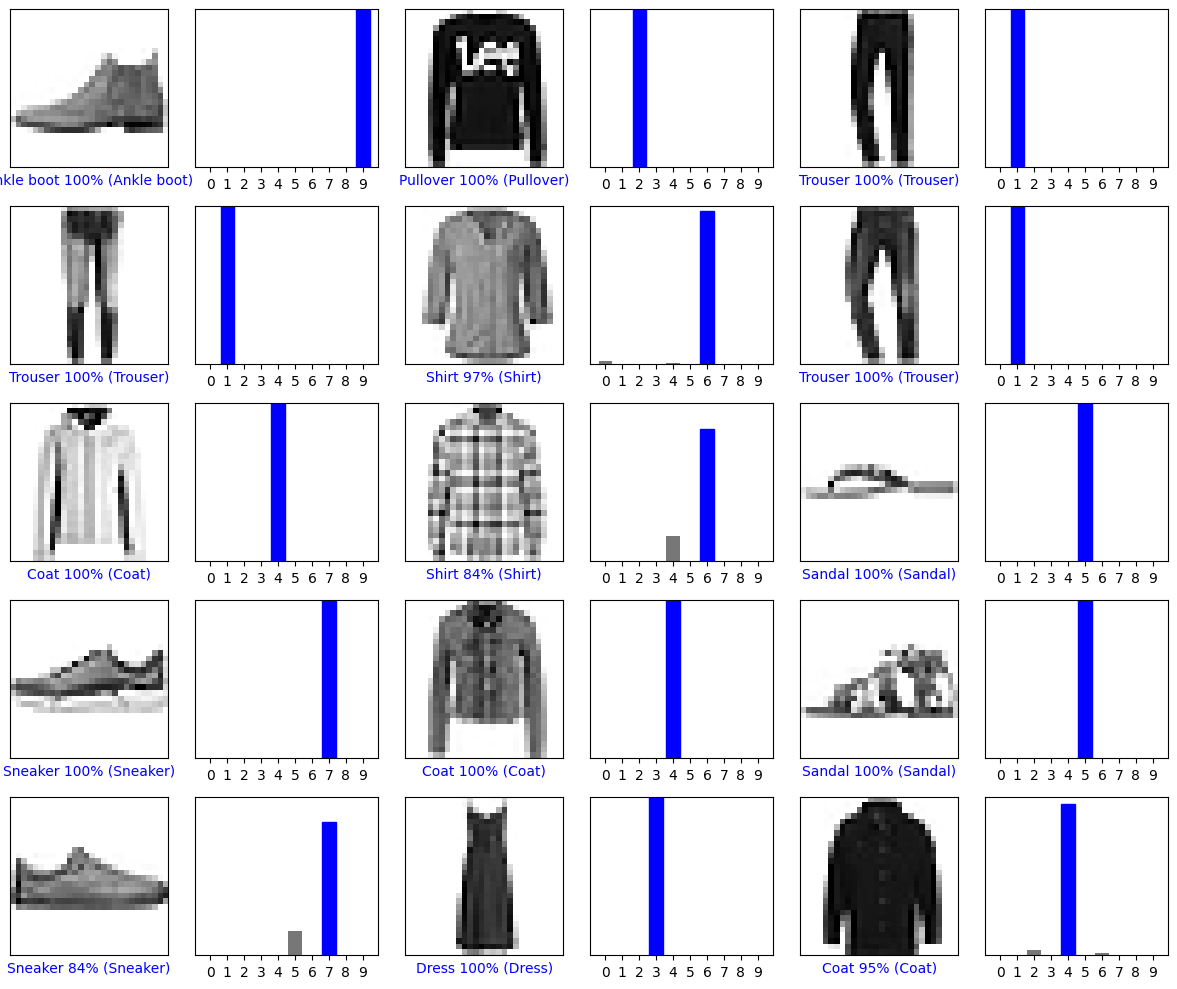

In [63]:
# Побудуємо декілька зображень та їх прогнози
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], y_test, x_test)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], y_test)
plt.tight_layout()
plt.show()

Модель добре навчилась та може достовірно класифікувати зображення.
Хоча це після великої кількості перебору структур моделі та параметрів.
Спочатку модель фейлила із передбаченням (я так вважаю, що через перенавчання) - кросівок у останньому ряду відносила до сандалів з вірогідністю 70%.